In [1]:
#del primer parcial:
import numpy as np                          #set herramientas para vectores y matrices
import math as mp
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy import signal as sig             #para ventanas
from scipy.signal import qmf, daub          
from scipy.io import loadmat                
import pywt
import numpy as np 
import math
import cmath                                #para complejos
import matplotlib.pyplot as plt             #para realizar graficos
from scipy import signal                    #para convolución lineal
from scipy.io.wavfile import read, write    #para leer, grabar archivos de audio formato wav
import scipy.linalg 
from math import pi                         #para usar solo pi,sin poner np. antes de usarlo

#se agregan:

#!pip install cv2  #para jupyternotebook por una única vez
#por única vez en CMD: conda install -c simpleitk simpleitk
!pip install simpleitk                     #para imagen en formato dicom 
import SimpleITK as sitk 
!pip install pydicom
import pydicom
import cv2                                 #para imágenes, Open CV (Computer Vision)
import sympy as sym
from sympy import *                        
from scipy import misc
from scipy.ndimage import rotate           #para rotar 
import sympy                               #para visualizar la matriz
from ssl import ALERT_DESCRIPTION_DECRYPT_ERROR    
import statistics as st 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 36.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 


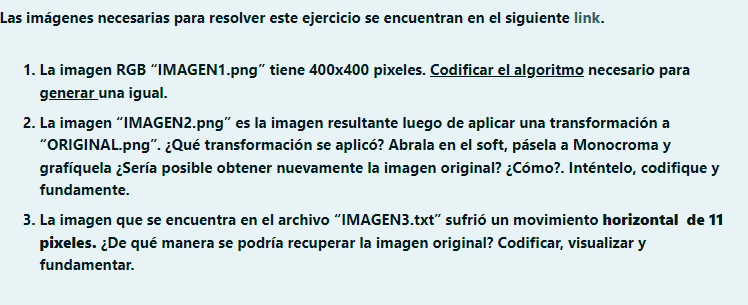

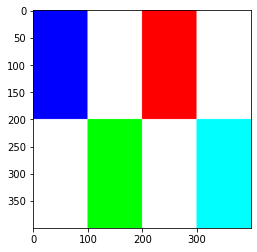

In [2]:
#IMAGEN 1 TIENE 400X400 pixeles. CODIFICAR EL ALGORITMO NECESARIO PARA GENERAR UNA IGUAL
I1=cv2.imread('IMAGEN1.png')
plt.imshow(I1)

(400, 400, 3)


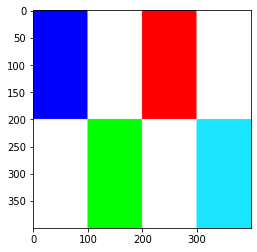

In [4]:
#RGB ROJO
R = np.zeros((200,100,3))
R[:,:,0]=1

#RGB VERDE
G = np.zeros((200,100,3))
G[:,:,1]=1

#RGB AZUL
B = np.zeros((200,100,3))
B[:,:,2]=1

#RGB CELESTE
C=np.zeros((200,100,3))
C[:,:,1]=0.9
C[:,:,0]=0.10
C[:,:,2]=1

#RG BLANCO
W=np.zeros((200,100,3))
W[:,:,1]=1
W[:,:,0]=1
W[:,:,2]=1

F1= np.concatenate ((B,W,R,W), axis=1)
F2= np. concatenate ((W,G,W,C), axis=1)
T= np.concatenate((F1,F2), axis=0)
plt.imshow(T)
print(T.shape)

#**2**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e228c34d0>,
 Text(0.5, 1.0, 'imagen DISTORCIONADA'))

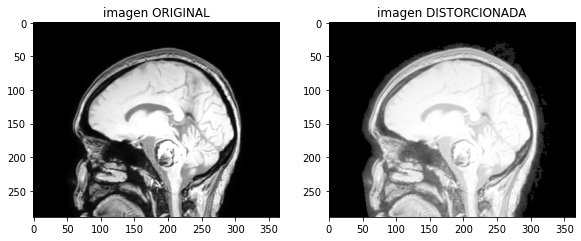

In [5]:
ORIGINAL=cv2.imread('ORIGINAL.png',0)
IMAGEN2=cv2.imread('IMAGEN2.png',0)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.subplot(131), plt.imshow(ORIGINAL,cmap='gray'), plt.title('imagen ORIGINAL') 
plt.subplot(132), plt.imshow(IMAGEN2,cmap='gray'), plt.title('imagen DISTORCIONADA')

#se aplico una transformacion de intensidad, donde la imagen se aclaró mediante un filtro exponencial. 
#se puede volver atras mediante oscurecimiento

In [6]:
def imadjust(img, In=(0,1.0), Out=(0,1.0), gamma=1.0):
    "J = low_out +(high_out - low_out).* ((I - low_in)/(high_in - low_in)).^ gamma"
    low_in,high_in = In
    low_out, high_out = Out
 
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         # Gamma transformation table
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if img[r,c] <= low_in:
                imgOut[r,c] = low_out                
            elif img[r,c] > high_in:
                imgOut[r,c] = high_out
            else:
                res = int(k*(img[r,c]-low_in) + low_out)
                imgOut[r,c] = table[res]#Check table
               
    return imgOut

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e23f9e7d0>,
 Text(0.5, 1.0, 'imagen solucionada'))

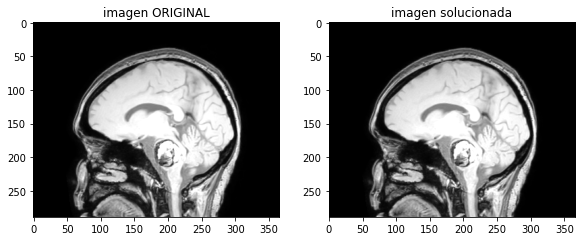

In [7]:
#oscurecemos:
I2=imadjust(IMAGEN2,(0,1),(0,1), 3) #gamma=2 >1 oscurece, Porque aumentan los valores de grises
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.subplot(131), plt.imshow(ORIGINAL,cmap='gray'), plt.title('imagen ORIGINAL') 
plt.subplot(132), plt.imshow(I2,cmap='gray'), plt.title('imagen solucionada')

#**3** La imagen 3 tiene mov horizontal de 11 pixeles. volver a original

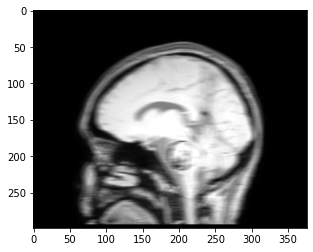

In [8]:
IMAGEN3= np.loadtxt('IMAGEN3.txt')
plt.imshow(IMAGEN3, cmap='gray')
plt.show()

In [9]:
#paso la imagen distorcionada al dominio de la frec
g=IMAGEN3
s1,s2 = g.shape[0],g.shape[1]
G=np.fft.fft2(g,(s1,s2))

In [10]:
#función para generar kernel de movimiento
def motion_kernel(tam=3, ang=45): 
  c=tam//2 
  if tam%2==1: tamm=tam
  else: tamm=tam+1
  kernel=np.zeros((tamm,tamm))
  kernel[c,0:tam]=1/tam
  M = cv2.getRotationMatrix2D((c,c),ang,1)
  kernel = cv2.warpAffine(kernel,M,(tamm,tamm))
  return kernel

In [11]:
kernelM=motion_kernel(11,0) #cantidad de pixeles y ángulo del movimiento 
print(kernelM)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.

In [12]:
H=np.fft.fft2(kernelM,(s1,s2)) #filtro en frecuencia 

In [13]:
eps= np.finfo(float).eps  #2.220446049250313e-16, numero muuuuy chiquito pero distinto de cero ;)
print(eps)
R_frec=G/(H+eps) # le "quitamos" el filtro/distorsión en frecuencia

#volvemos al dominio espacial
f_R=np.abs(np.fft.ifft2(R_frec)) 

#Notar que en este bloque NO usamos la original, sólo la distorsionada y el filtro (hay que conocerlo)

2.220446049250313e-16


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e223dba50>,
 Text(0.5, 1.0, 'imagen restaurada'))

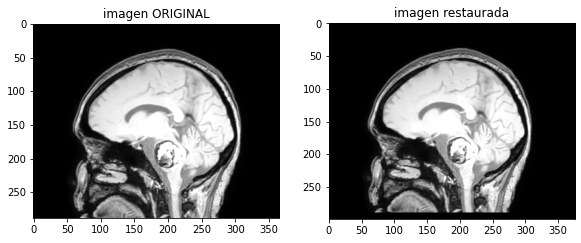

In [14]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.subplot(131), plt.imshow(ORIGINAL,cmap='gray'), plt.title('imagen ORIGINAL') 
plt.subplot(132), plt.imshow(f_R,cmap='gray'), plt.title('imagen restaurada')